# Лабораторная работа №1

## Разведочный анализ данных. Исследование и визуализация данных.

## Описание датасета

 Этот датасет содержит информацию об успеваемости старшеклассников по математике, включая их оценки и демографическую информацию. Данные были собраны в трех средних школах США.

### Описание столбцов

* 'Gender'- пол учащегося
* 'Race/ethnicity' - расовая или этническая принадлежность учащегося
* 'Parental level of education' - самый высокий уровень достигнутого образования родителем (родителями) или опекуном (опекунами) учащегося
* 'Lunch' - получает ли учащийся бесплатный обед или обед по сниженной цене
* 'Test preparation course' - прошел ли учащийся курс подготовки к экзаменам
* 'Math score' -  оценка учащегося за стандартизированный тест по математике
* 'Reading score' - оценка учащегося за стандартизированный тест по чтению
* 'Writing score' - оценка учащегося за стандартизированный тест по письму

## Выгрузка библиотек и датасета

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [101]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv("exams.csv") 

## Характеристики датасета
Информация о датасете

In [102]:
# Первые 5 строк датасета 
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [103]:
# Размер датасета - 1000 строк, 8 колонок
data.shape

(1000, 8)

In [105]:
# Список колонок
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [106]:
# Список колонок с типами данных
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [107]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 0
reading score - 0
writing score - 0


In [108]:
# Основные статистические характеристки набора данных
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [109]:
# Определим уникальные значения для целевого признака
data['parental level of education'].unique()

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

## Визуализация

In [110]:
# Посчитаем количество студентов каждого пола
gen_count = pd.DataFrame(data['gender'].value_counts().reset_index())
gen_count.rename(columns = {'index':'gender','gender':'number of students'}, inplace=True)
gen_count

,gender,number of students
0,male,508
1,female,492


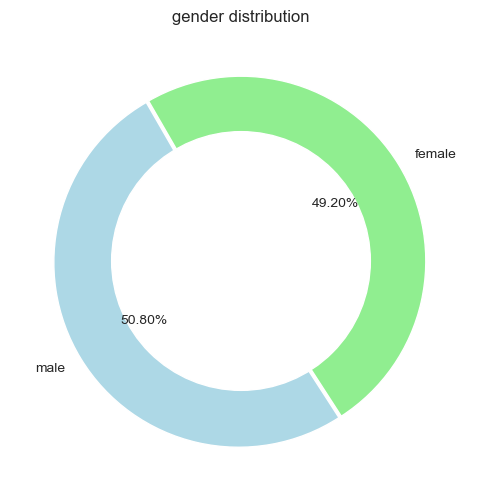

In [111]:
# Распределение студентов по полу
plt.figure(figsize=(8,6))
plt.pie(gen_count['number of students'], explode=(0.015,0),
        labels=gen_count['gender'],
        colors=['lightblue','lightgreen'], autopct='%1.2f%%', 
        startangle=120)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("gender distribution")
plt.show()

In [112]:
# Посчитаем количесттво студентов получавших бесплатный обед или обед по сниженной цене
pd.DataFrame(data['lunch'].value_counts()).rename(columns={'lunch': 'number of students'})

,number of students
standard,660
free/reduced,340


### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены

<Axes: xlabel='race/ethnicity', ylabel='math score'>

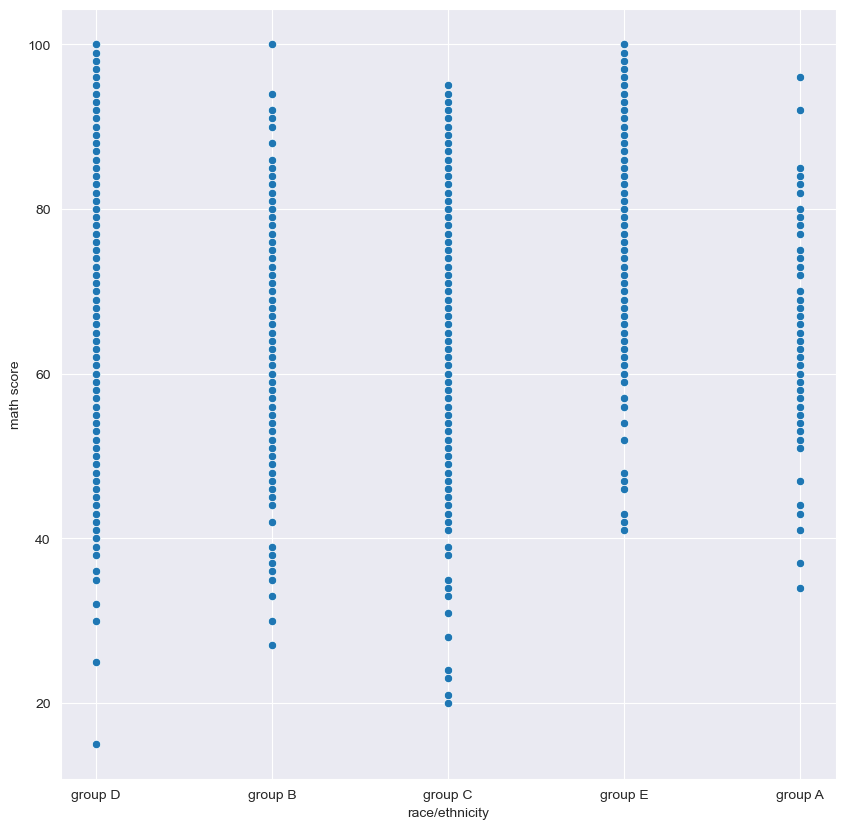

In [113]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='race/ethnicity', y='math score', data=data)

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\3962117529.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['math score'])


<Axes: xlabel='math score', ylabel='Density'>

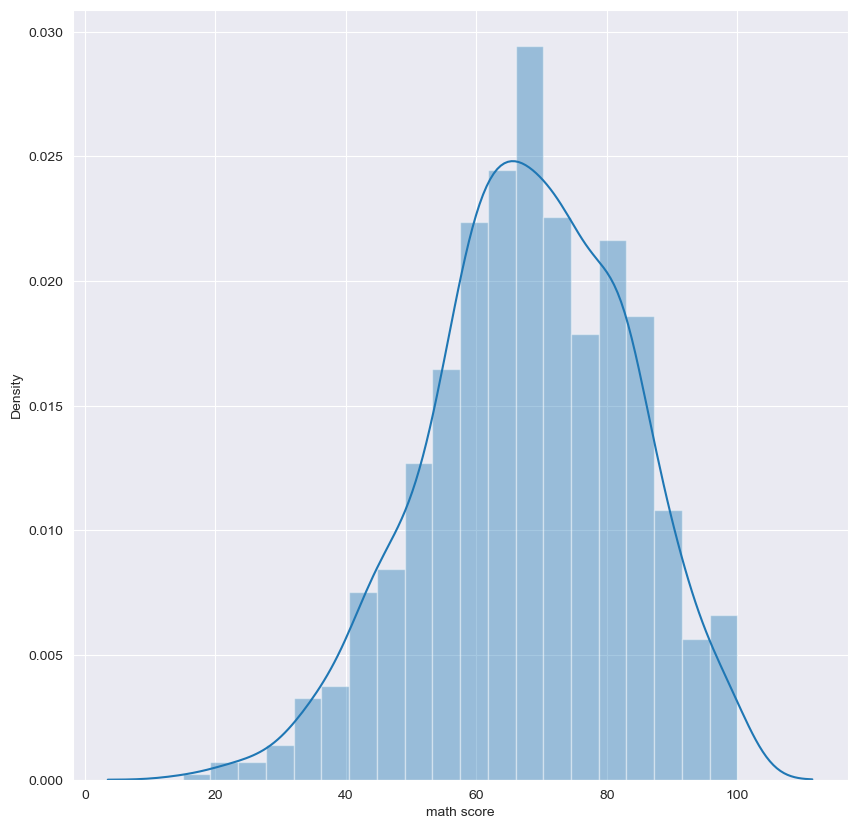

In [116]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['math score'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

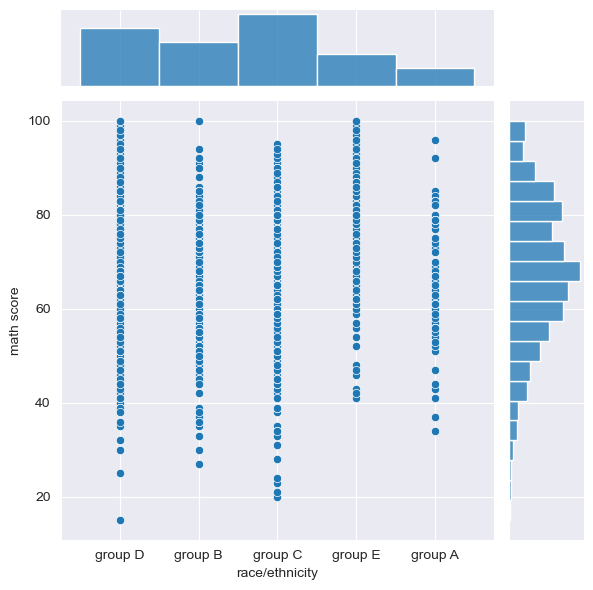

In [117]:
sns.jointplot(x='race/ethnicity', y='math score', data=data)

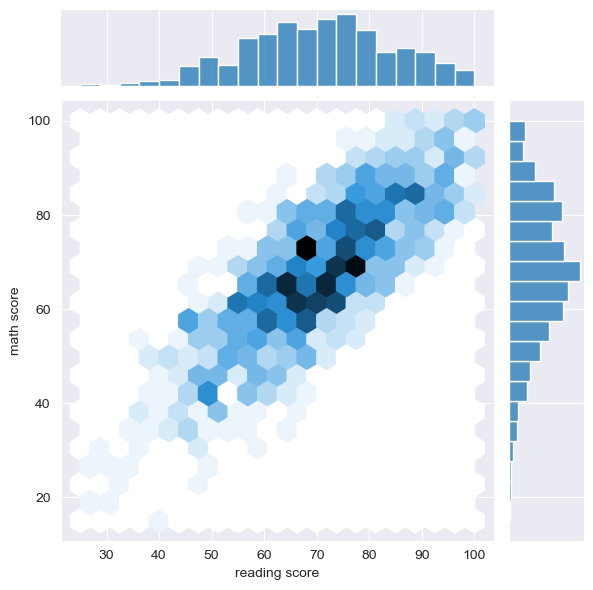

In [118]:
sns.jointplot(x='reading score', y='math score', data=data, kind="hex")

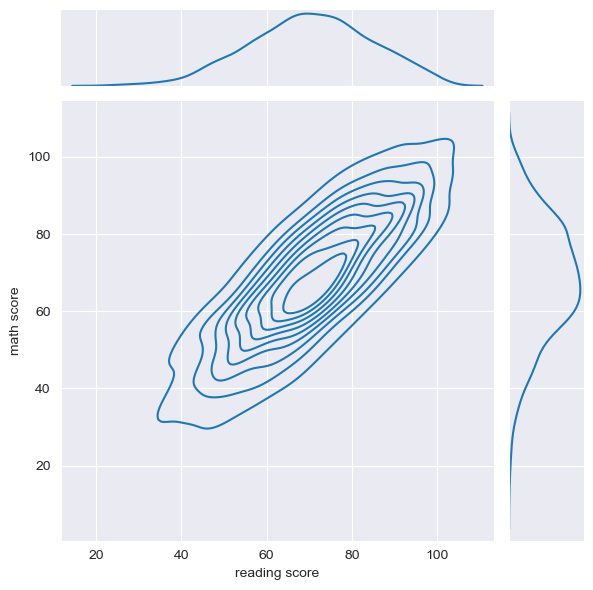

In [119]:
sns.jointplot(x='reading score', y='math score', data=data, kind="kde")

### Парные диаграммы
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

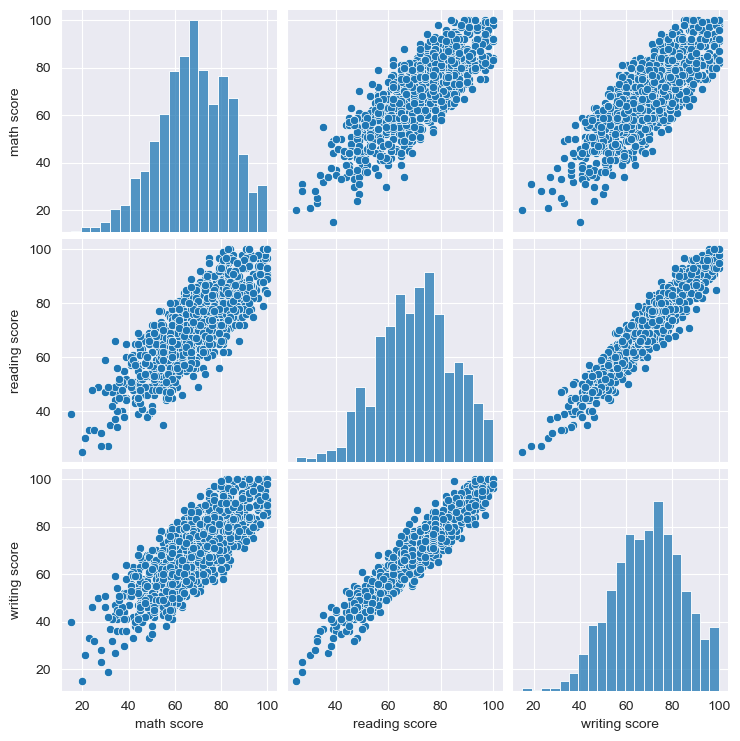

In [120]:
sns.pairplot(df)

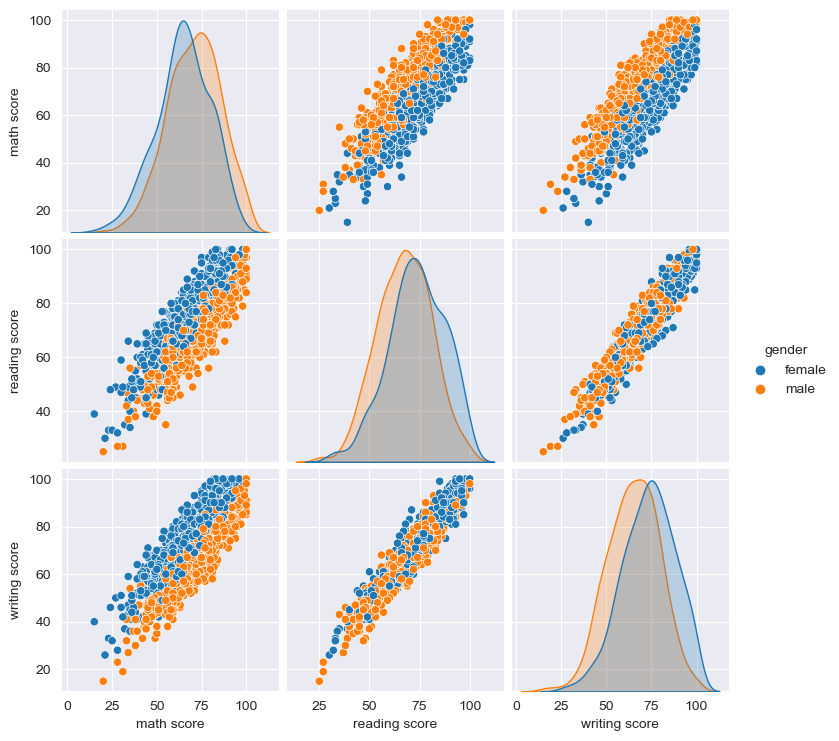

In [121]:
sns.pairplot(data, hue="gender")

### Ящик с усами
Отображает одномерное распределение вероятности.

<Axes: xlabel='math score'>

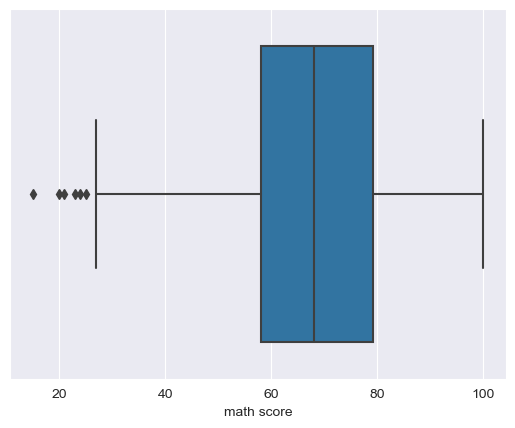

In [122]:
# По горизонтали
sns.boxplot(x=data['math score'])

<Axes: ylabel='math score'>

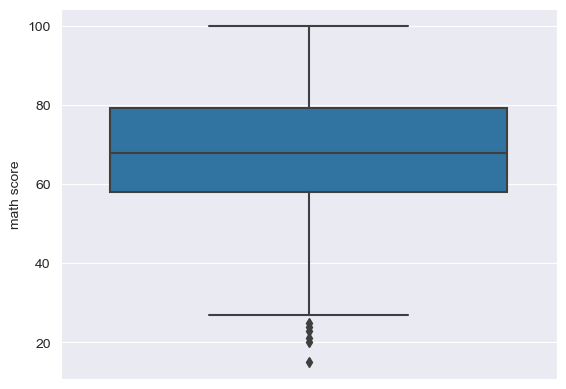

In [123]:
# По вертикали
sns.boxplot(y=data['math score'])

<Axes: xlabel='gender', ylabel='math score'>

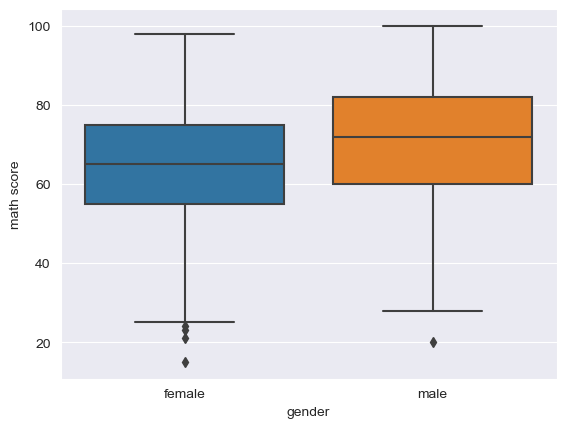

In [124]:
# Распределение параметра Humidity сгруппированные по gender.
sns.boxplot(x='gender', y='math score', data=data)

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

<Axes: xlabel='math score'>

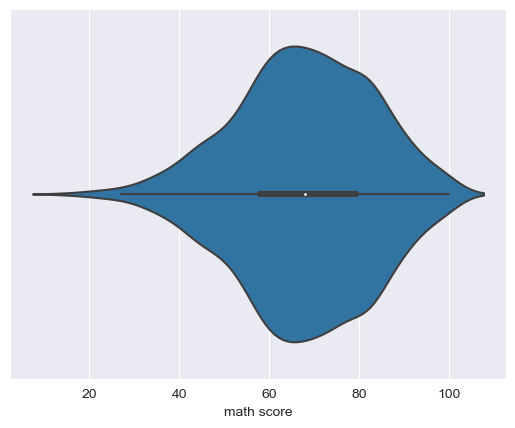

In [125]:
sns.violinplot(x=df['math score'])

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\1383574209.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['math score'], ax=ax[1])


<Axes: xlabel='math score', ylabel='Density'>

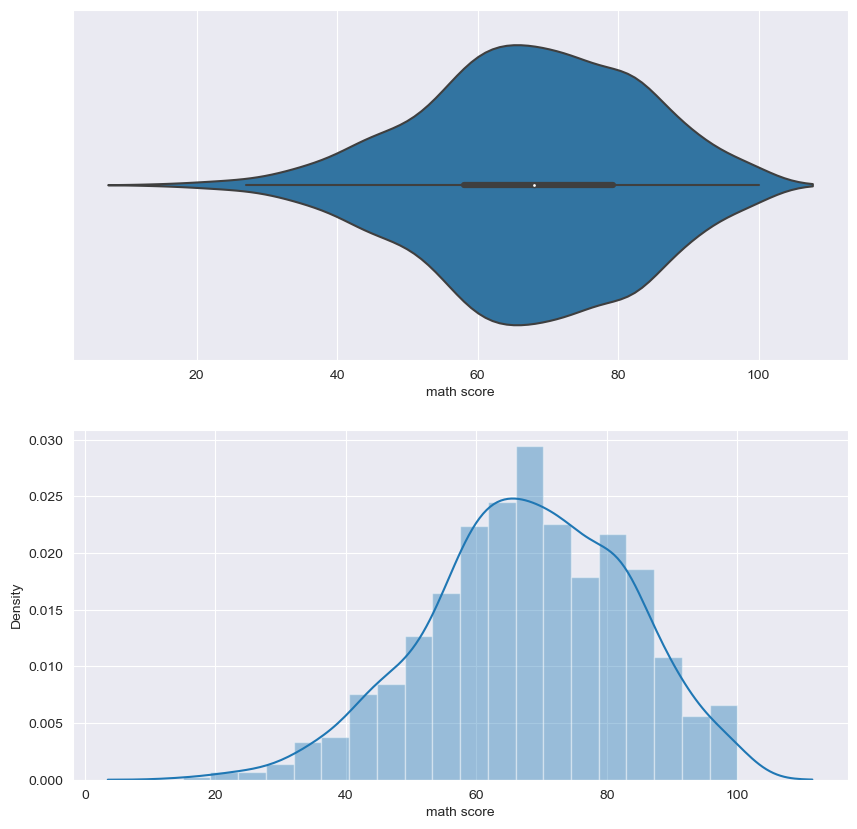

In [126]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['math score'])
sns.distplot(data['math score'], ax=ax[1])

<Axes: xlabel='gender', ylabel='math score'>

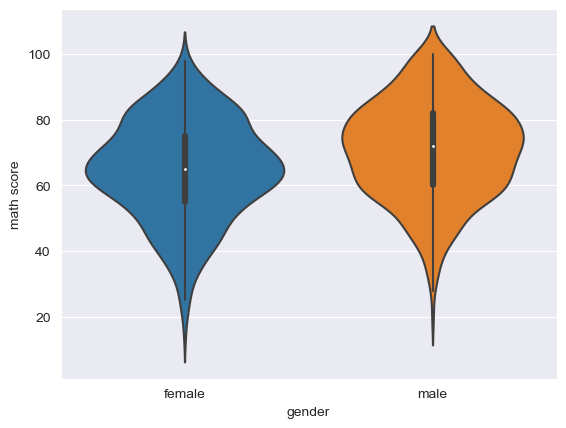

In [127]:
# Распределение параметра math score сгруппированные по gender.
sns.violinplot(x='gender', y='math score', data=data)

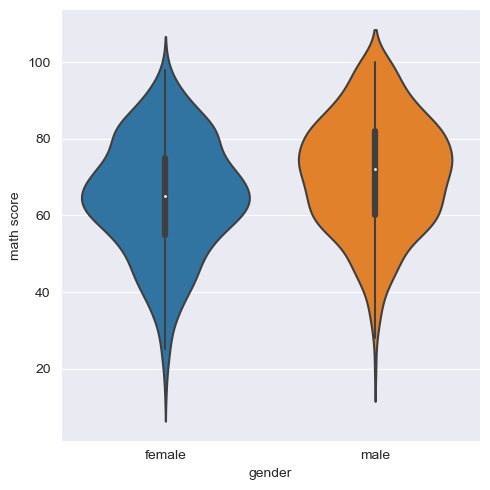

In [128]:
sns.catplot(y='math score', x='gender', data=data, kind="violin", split=True)

## Корреляция признаков


In [129]:
data.corr()

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


In [130]:
data.corr(method='pearson')

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2721894934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,math score,reading score,writing score
math score,1.000000,0.811767,0.790055
reading score,0.811767,1.000000,0.948909
writing score,0.790055,0.948909,1.000000


In [131]:
data.corr(method='kendall')

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\1809062968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='kendall')


,math score,reading score,writing score
math score,1.000000,0.614651,0.587189
reading score,0.614651,1.000000,0.812124
writing score,0.587189,0.812124,1.000000


In [132]:
data.corr(method='spearman')

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2316115903.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,math score,reading score,writing score
math score,1.000000,0.803238,0.779234
reading score,0.803238,1.000000,0.944895
writing score,0.779234,0.944895,1.000000


C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\4207686265.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

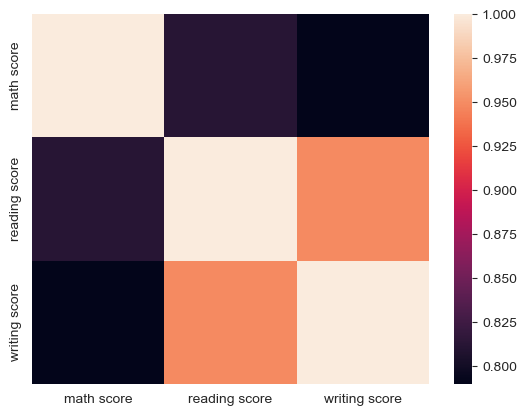

In [133]:
# Тепловая карта
sns.heatmap(data.corr())

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\3346571371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.3f')


<Axes: >

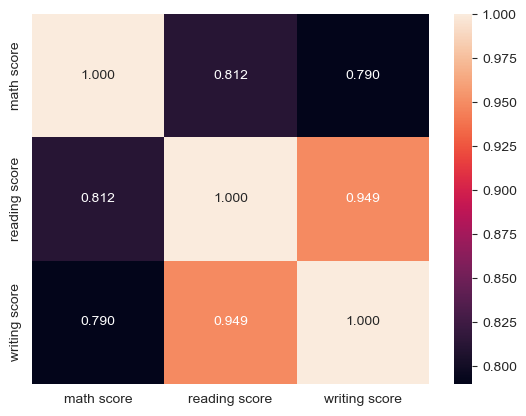

In [134]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2775068298.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')


<Axes: >

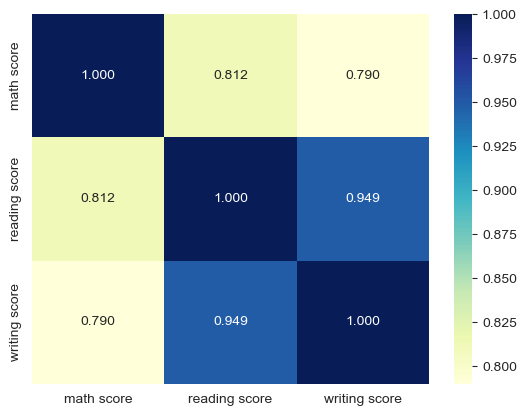

In [135]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\1168097721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\1168097721.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\1168097721.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default

<Axes: >

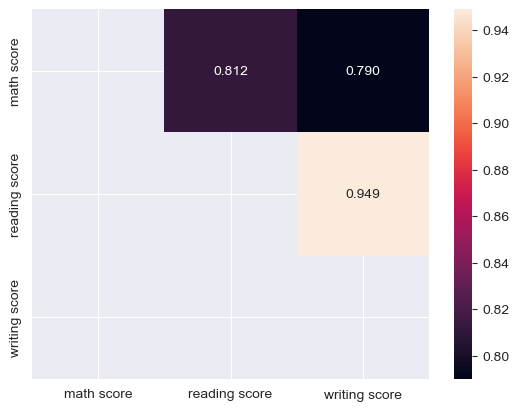

In [136]:
# Треугольный вариант матрицы
mask = np.zeros_like(df.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2698977660.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2698977660.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2698977660.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

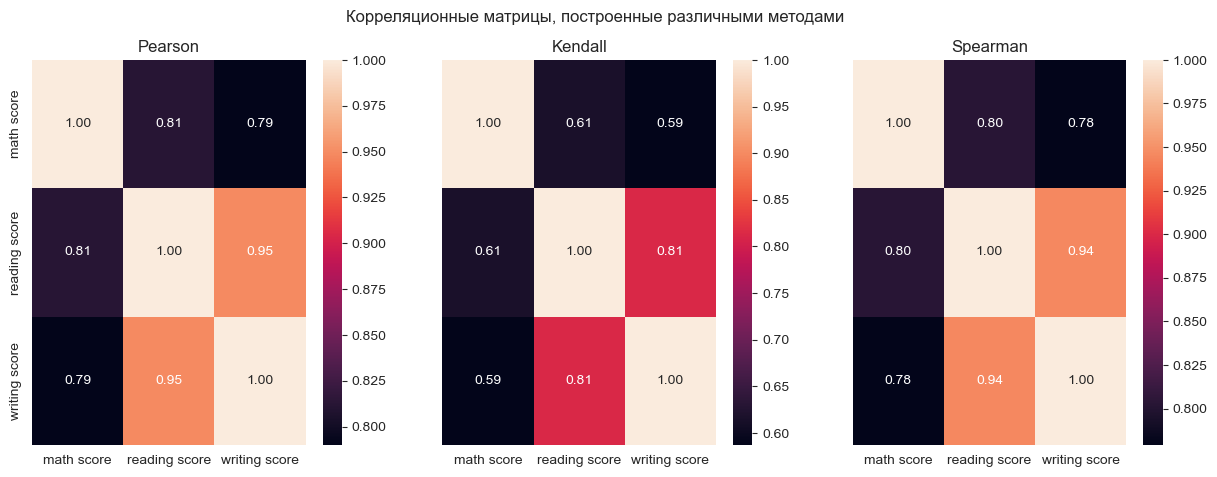

In [137]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

## Тепловая карта с указанием размера

C:\Users\sashu\AppData\Local\Temp\ipykernel_3940\2508226105.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')


<Axes: >

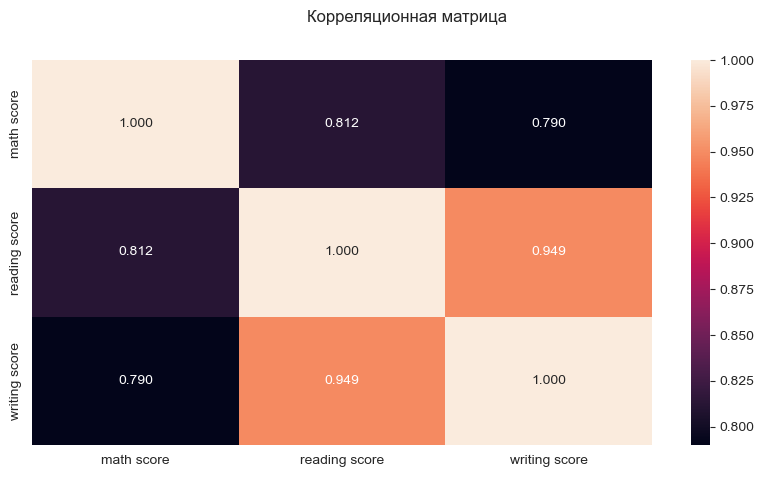

In [138]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')